In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [12]:
c = 299792458
h = 6.62607004E-34

def atmToPa(atm):
    return atm * 1.01325 * 100000

# Blackbody spectrum
def B(λ, T):
    return ((2 * h * c**2) / (λ**5)) / (np.exp((h * c) / (λ * k * T)) - 1)

## Exercise 1

In [4]:
P = atmToPa(1)              # Pa        Atmospheric pressure
g = 9.81                    # m s^-2    Gravity
r = 6371e3                  # m         Radius
A = 4 * np.pi * r**2        # m^2       Surface area

M = (A * P) / g             # kg        Mass of atmosphere
print("Mass of Earth's atmosphere: {} kg".format(M))

Mass of Earth's atmosphere: 5.268326464450488e+18 kg


## Exercise 2

[Earth, Titan]
[8380.157723776823, 20164.97696138414]


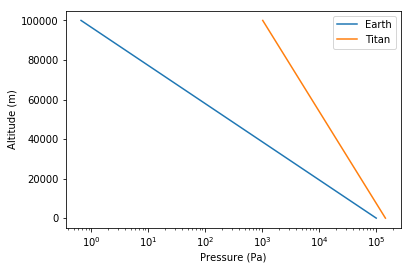

In [5]:
k = 1.381e-23               # J K^-1    Boltzmann constant
Mh = 1.67e-27               # g         Mass of hydrogen
T = [288, 94.15]            # K         Temperature
mbar = [28.97*Mh, 28.6*Mh]  # g         Mean molecular mass
g = [9.81, 1.35]            # m s^-2    Gravity

H = [((k * T[0]) / (mbar[0] * g[0])), ((k * T[1]) / (mbar[1] * g[1]))]    # m         Scale height
print("[Earth, Titan]")
print(H)

Ps = [atmToPa(1), atmToPa(1.45)]                                          # Pa        Surface pressure
z = np.linspace(0, 100e3, 100)                                            # m         Height
Pz = [(Ps[0] * np.exp(-z / H[0])), (Ps[1] * np.exp(-z / H[1]))]           # Pa        Pressure at height z

fig, ax = plt.subplots()
ax.plot(Pz[0], z, label = "Earth")
ax.plot(Pz[1], z, label = "Titan")
ax.legend()
ax.set_xlabel("Pressure (Pa)")
ax.set_ylabel("Altitude (m)")
ax.set_xscale("log")

## Exercise 3

In [94]:
L = 3.828e26        # W             Solar luminosity
S = 1.496e11        # m             Semimajor axis of Earth
σ = 5.670367e-8     # W m^-2 K^-4   Stefan-Boltzmann constant

F = L / (4 * np.pi * S**2)    # W m^-2        Flux
I = F * np.pi * r**2          # W             Solar incidence on disk of Earth
T = (F / σ)**(1/4)            # K             Temperature
print("Incident: {} W".format(I))
print("Blackbody emission: {} K".format(T))

Incident: 1.7356572266239386e+17 W
Blackbody emission: 393.61526021275006 K


## Exercise 4

(0.1, 3)

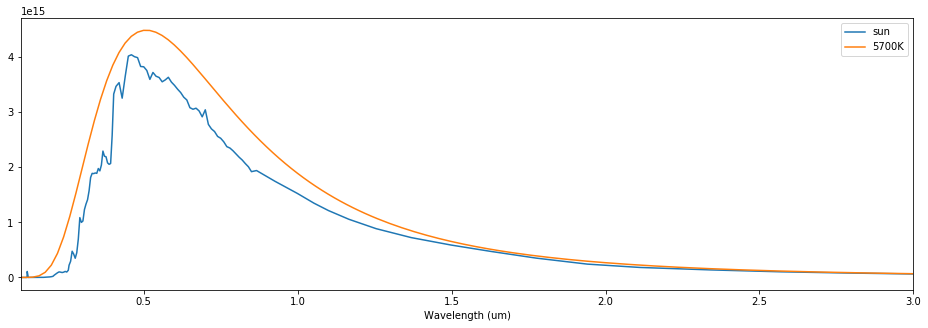

In [133]:
sun = np.genfromtxt('sun_um.dat', names = True)

# Make 5700K spectrum
x = np.linspace(1.0E-7, 6.0E-5, 3000)
y = B(x, 5700)
ySum = np.sum(y)

# Scaling
x *= 1e6
y *= I / ySum        # Scale to solar incidence on Earth
sun["arb"] *= 2e16

fig, ax = plt.subplots(figsize = (16, 5))
ax.plot(sun["wavelength"], sun["arb"], label = "sun")
ax.plot(x, y, label = "5700K")
ax.legend()
ax.set_xlabel("Wavelength (um)")
ax.set_xlim(0.1, 3)

## Exercise 5

(0, 10)

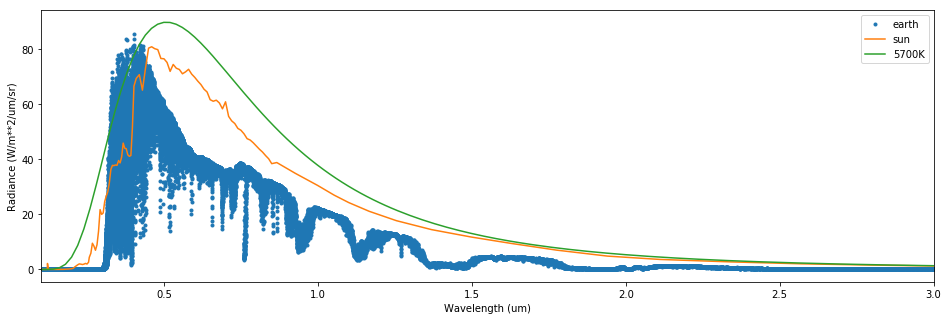

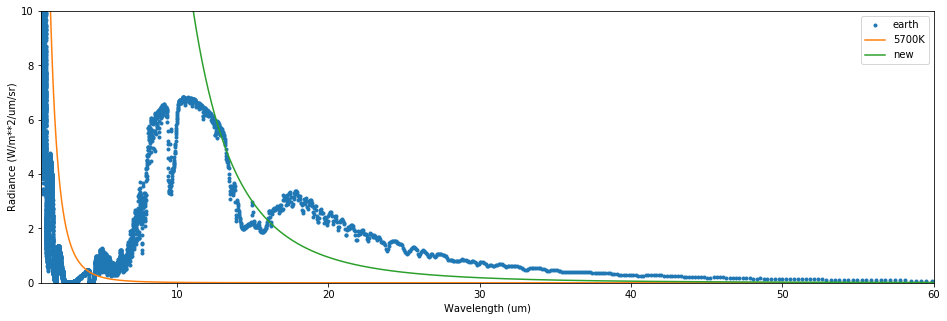

In [137]:
earth = np.genfromtxt('earth_24hr_diskavg_radiance.dat', names = True)

fig, ax = plt.subplots(figsize = (16, 5))
ax.plot(earth["wavelength"], earth["radiance"], '.', label = "earth")
ax.plot(sun["wavelength"], sun["arb"] * 2e-14, label = "sun")
ax.plot(x, y * 2e-14, label = "5700K")
ax.legend()
ax.set_xlabel("Wavelength (um)")
ax.set_ylabel("Radiance (W/m**2/um/sr)")
ax.set_xlim(0.1, 3)

y2 = B(x * 1e-6, 5e6) * (I / ySum)

fig, ax = plt.subplots(figsize = (16, 5))
ax.plot(earth["wavelength"], earth["radiance"], '.', label = "earth")
ax.plot(x, y * 2e-14, label = "5700K")
ax.plot(x, y2 * 2e-14, label = "new")
ax.legend()
ax.set_xlabel("Wavelength (um)")
ax.set_ylabel("Radiance (W/m**2/um/sr)")
ax.set_xlim(1, 60)
ax.set_ylim(0, 10)